In [ ]:
!git clone https://github.com/egbertbouman/youtube-comment-downloader.git

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
!python3 /content/youtube-comment-downloader/downloader.py -y vXWiPfsMCGI -o output.txt

In [ ]:
!uniq /content/Malayalam_Tagged_Data.txt 

In [ ]:
#Code for data extraction
import json
with open('data.txt', 'w') as outfile:
    with open('output.txt','r') as sample:
         for line in sample:
             line = json.loads(line.strip())
             a=line['text']
             outfile.writelines(a)
       

In [ ]:
#code for removing emojis
import emoji
import re
def strip_emoji(text):
    print(emoji.emoji_count(text))
    new_text = re.sub(emoji.get_emoji_regexp(), r"", text)
    return new_text
with open("data.txt", "r") as file:
    old_text = file.read()
no_emoji_text = strip_emoji(old_text)
with open("new.txt", "w+") as new_file:
    new_file.write(no_emoji_text)


1903


In [ ]:
import re
with open('new.txt','r') as sample:
     with open('malayalam.txt','w+') as mala_sample:
          with open('Mixedenglish.txt','w+') as mix_sample:
              for line in sample:
                 manglish=re.findall('[A-z`~!@#$%|^&*()_+:;""''?/\.,]+',line)
                 malayalam=re.findall('[\u0D00-\u0D7F]+',line)
                 out_str = "\n".join(manglish)
                 out_str1 = "\n".join(malayalam)
                 mix_sample.write(out_str)
                 mala_sample.write(out_str1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#for sorting
!sort /content/corpus.txt -u corpus.txt -o corpus.txt

In [ ]:
!uniq /content/Mixedenglish.txt

In [ ]:
!uniq --help


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
with open("Bed012.txt",'r') as sam:
  with open("english.txt","w") as eng:
     for line in sam:
        pos=sam.read()
        sh=word_tokenize(pos)
        out_str = "\n".join(sh)
        x=out_str.replace("_"," en_")
        eng.write(x)

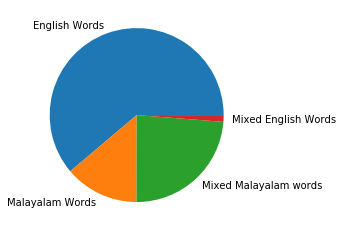

In [ ]:
#code for draw piechart
import re
import matplotlib.pyplot as plt

en=0
eng=0
mal=0
ml=0
with open("corpuspos.txt","r") as sample:
     for line in sample:
        exp = re.compile('en_')
        exp1 = re.compile('mal_')
        exp2 = re.compile('ml_')
        exp3 = re.compile('eng_')
        if re.search(exp,line):
            en +=1
        elif re.search(exp1,line):
            mal +=1
        elif re.search(exp2,line):
            ml +=1
        else:
            eng +=1
     exp_vals=[en,ml,mal,eng]   
     exp_labels=["English Words","Malayalam Words","Mixed Malayalam words","Mixed English Words"]
     plt.pie(exp_vals,labels=exp_labels)
     

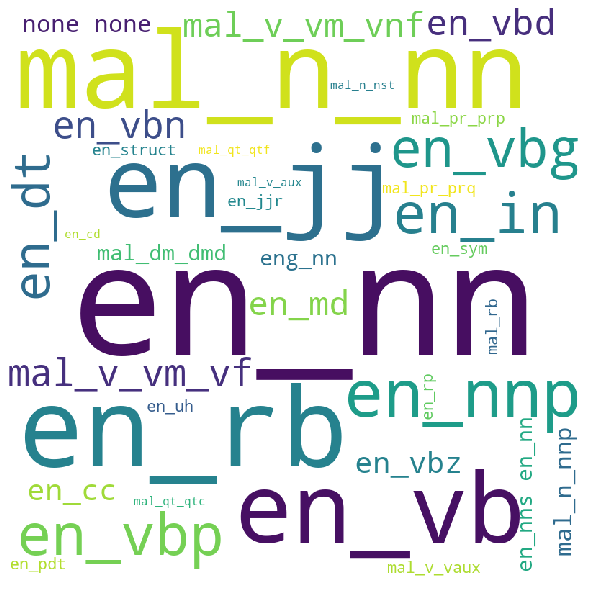

In [ ]:
#code for wordcloud
from wordcloud import WordCloud
comment_words = ' '

with open("corpuspos.txt","r") as sample:
  lines1=sample.read()
  lines1 = [line1.split() for line in sample]
  df1=pd.DataFrame(lines1)  
for val in df[:][1]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()
img = BytesIO()
    plt.savefig(img)
    img.seek(0)

In [ ]:
with open("cor.txt") as textFile:
        lines = [line.split() for line in textFile]
df=pd.DataFrame(lines) 
print(df[:][1])
with open("corpuspos.txt") as sample:
        lines1 = [line1.split() for line in sample]
        df1=pd.DataFrame(lines1) 
sample.close()

In [ ]:
!sort english.txt -u english.txt -o english.txt

In [ ]:
!sort corpuspos.txt -u corpuspos.txt  -o corpuspos.txt

In [ ]:
from tabulate import tabulate

with open("ooo.txt","r") as f:
	  for line in f:
		    raw=f.readlines()
new=tabulate(raw)
with open("new.txt","w") as sample:
        sample.write(new)
